# Star Wars Survey

The team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering this question about Star Wars fans, **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.

The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)

* `Gender` - The respondent's gender

* `Age` - The respondent's age

* `Household Income` - The respondent's income

* `Education` - The respondent's education level

* `Location (Census Region)` - The respondent's location

* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response

* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response

## Load the dataframe

Specify an encoding because the dataframe has some characters that aren't in Python's default utf-8 encoding.

In [1]:
#import packages
import pandas as pd

#load dataframe
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## Remove missing data from a column

In [2]:
#Remove any rows where RespondentID is NaN 
#Only select rows where the RespondentID column is not null
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Inspect the dataframe

In [3]:
#review star_wars_survey dataframe column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#explore dataframe, look at first 10 rows
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

Take a look at the next two columns, which are:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes`/`No` questions. They can also be `NaN` where a respondent chooses not to answer a question. 

Use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

In [5]:
#determine the data types of each column in the star wars dataframe
star_wars.dtypes

RespondentID                                                                                                                                     float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                      object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             object
Which of the following Star Wars films have you seen? Please select all that apply.                                                               object
Unnamed: 4                                                                                                                                        object
Unnamed: 5                                                                                                                                        object
Unnamed: 6                                                                        

## Convert the data type of two columns

The data can be a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

Use the pandas.Series.map() method on series objects to perform the conversion.

In [6]:
#create a dictionary to 
#define a mapping from each value in the column to a new value
yes_no = {"Yes": True, "No": False}

#Convert the 'Have you seen any of the 6 films in the Star Wars franchise?' column to the Boolean type
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

#Convert the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column to the Boolean type
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [7]:
#check the column to verify successful mapping
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
#check the column to verify successful mapping
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Clean and Map checkbox columns

The next six columns represent a single checkbox question.

The respondent checked off a series of boxes in response to the question, **Which of the following Star Wars films have you seen?** 

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.

* `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.

* `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.

* `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.

* `Unnamed: 7`- Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.

* `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie.

If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [9]:
#view column names in a list
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [10]:
#view column names and column contents before cleaning and mapping
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [11]:
#import package
import numpy as np

#create a dictionary to 
#define a mapping from each value in the column to a new value
movie_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

#save all checkbox column names to a variable
columns = ['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

#use a for loop to:
for col in columns:
    #change the columns to a boolean type (to contain True, False only)
    star_wars[col] = star_wars[col].map(movie_map)

In [12]:
#rename columns
star_wars = star_wars.rename(columns ={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
       'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'})

In [13]:
#check that the changes to the columns was successful
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


## Clean the Ranking columns

The next six columns ask to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. 

Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`

* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`

* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`

* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`

* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`

* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

In [14]:
#view columns before cleaning
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [15]:
#convert each column to a numeric type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
#view column names in a list
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [17]:
#rename columns
star_wars = star_wars.rename(columns ={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6'})

In [18]:
#check that the changes to the columns was successful
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Now that the ranking columns are cleaned up, you can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on the dataframe.

## Determine the rank of the Star Wars movies

In [19]:
#calculate the mean of each ranking column
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<Container object of 6 artists>

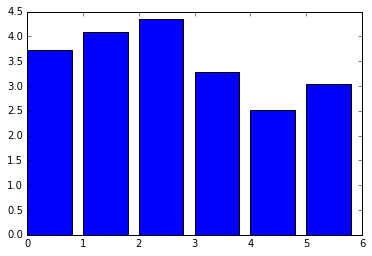

In [20]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

#default bar chart
plt.bar(range(6) ,star_wars[star_wars.columns[9:15]].mean())

In [21]:
#take the mean of the each column
#reset the index of the mean_rankings
mean_rankings = star_wars[star_wars.columns[9:15]].mean().reset_index()

#Rename the 0 column to 'Mean'
mean_rankings.rename(columns={0: 'Mean'}, inplace=True)
#Rename the 'index' column to 'Episodes'
mean_rankings.rename(columns={'index': 'Episodes'}, inplace=True)

mean_rankings

,Episodes,Mean
0,ranking_1,3.732934
1,ranking_2,4.087321
2,ranking_3,4.341317
3,ranking_4,3.272727
4,ranking_5,2.513158
5,ranking_6,3.047847


In [22]:
# Defining a function for renaming labels and the Mean column
def rename_labels_column_name(df, old_labels, column_name):
    
    # Renaming old labels to the corresponding episodes
    df['Episodes']= df['Episodes'].str.replace(old_labels,'Episode')
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('Episodes', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the Mean column to 'rankings'
rename_labels_column_name(df=mean_rankings, 
                          old_labels='ranking',
                          column_name='Mean')

mean_rankings

,Mean
Episodes,
Episode_1,3.732934
Episode_2,4.087321
Episode_3,4.341317
Episode_4,3.272727
Episode_5,2.513158
Episode_6,3.047847


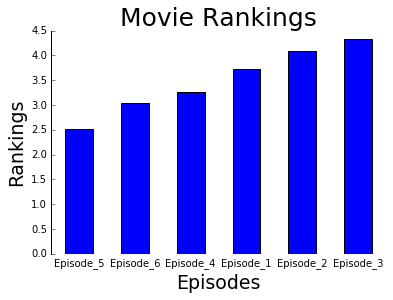

In [23]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    df[column].sort_values().plot.bar(color='blue', rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', bottom = False, right = False, top = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=mean_rankings,
         column ='Mean',
         title='Movie Rankings',
         ylabel='Rankings',
         xlabel='Episodes')

Conclusion:

`Episode_5` is the most popular Star Wars movie.
`Episode_3` is the least popular Star Wars movie.

## Find the most viewed Star Wars movie

Earlier in this project, the seen columns were cleaned up and their values were converted to Boolean type. 

When using methods like `pandas.DataFrame.sum()` or `pandas.DataFrame.mean()`, Booleans are treated like integers:

* `True` is considered `1`
* `False` is considered `0`

That means you can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [24]:
#create dataframe with the 6 seen columns only
star_wars_seen = star_wars[star_wars.columns[3:9]]

star_wars_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [25]:
#take the sum of each of the seen columns
star_wars_sums = star_wars_seen.sum()

star_wars_sums

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

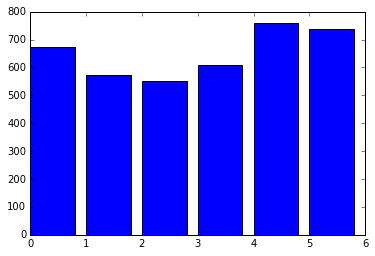

In [26]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

#default bar chart
plt.bar(range(6), star_wars_sums)

In [27]:
#take the sum of the each column
#reset the index of the star_wars_sum
star_wars_sum = star_wars[star_wars.columns[3:9]].sum().reset_index()

#Rename the 0 column to 'Sum'
star_wars_sum.rename(columns={0: 'Sum'}, inplace=True)
#Rename the 'index' column to 'Seen'
star_wars_sum.rename(columns={'index': 'Seen'}, inplace=True)

star_wars_sum

,Seen,Sum
0,seen_1,673
1,seen_2,571
2,seen_3,550
3,seen_4,607
4,seen_5,758
5,seen_6,738


In [28]:
# Defining a function for renaming labels and the Mean column
def rename_column_name(df, column_name):
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('Seen', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the Mean column to 'rankings'
rename_column_name(df=star_wars_sum, 
                          column_name='Sum')

star_wars_sum

,Sum
Seen,
seen_1,673
seen_2,571
seen_3,550
seen_4,607
seen_5,758
seen_6,738


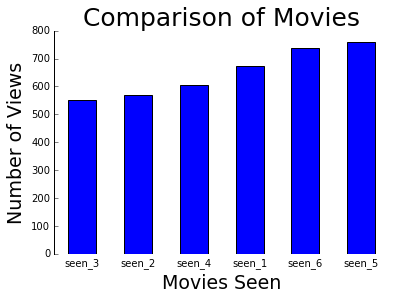

In [29]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    df[column].sort_values().plot.bar(color='blue', rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', bottom = False, right = False, top = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=star_wars_sum,
         column ='Sum',
         title ='Comparison of Movies',
         ylabel ='Number of Views',
        xlabel = 'Movies Seen')

Conclusion:

The most seen movie is `seen_5`.

The least seen movie is `seen_3`.

## Exploring the data by binary segments

Examine how certain segments of the survey population responded.

There are several columns that segment our data into two groups. 

Here are a few examples:

* Do you consider yourself to be a fan of the Star Wars film franchise? - `True` or `False`

* Do you consider yourself to be a fan of the Star Trek franchise? - `Yes` or `No`

* Gender - `Male` or `Female`

Split a dataframe into two groups based on a binary column by creating two subsets of that column.

The subsets will allow you to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

## Split the data into two groups based on gender

In [36]:
#Split the data into two groups based on one of the binary columns above
#Gender is the binary column used below
male_fans = star_wars[star_wars["Gender"] == "Male"]
female_fans = star_wars[star_wars["Gender"] == "Female"]

## Determine the rank of the Star Wars movies according to male fans

In [37]:
#calculate the mean of each ranking column
male_fans[male_fans.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [38]:
#take the mean of the each column
#reset the index of the mean_rankings
male_fans_mean_rankings = male_fans[male_fans.columns[9:15]].mean().reset_index()

#Rename the 0 column to 'Mean'
male_fans_mean_rankings.rename(columns={0: 'Mean'}, inplace=True)
#Rename the 'index' column to 'Episodes'
male_fans_mean_rankings.rename(columns={'index': 'Episodes'}, inplace=True)

male_fans_mean_rankings

,Episodes,Mean
0,ranking_1,4.037825
1,ranking_2,4.224586
2,ranking_3,4.274882
3,ranking_4,2.997636
4,ranking_5,2.458629
5,ranking_6,3.002364


In [39]:
# Defining a function for renaming labels and the Mean column
def rename_labels_column_name(df, old_labels, column_name):
    
    # Renaming old labels to the corresponding episodes
    df['Episodes']= df['Episodes'].str.replace(old_labels,'Episode')
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('Episodes', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the Mean column to 'rankings'
rename_labels_column_name(df=male_fans_mean_rankings, 
                          old_labels='ranking',
                          column_name='Mean')

male_fans_mean_rankings

,Mean
Episodes,
Episode_1,4.037825
Episode_2,4.224586
Episode_3,4.274882
Episode_4,2.997636
Episode_5,2.458629
Episode_6,3.002364


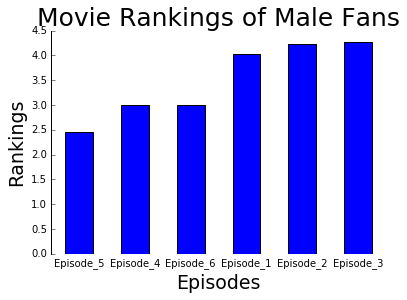

In [45]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    df[column].sort_values().plot.bar(color='blue', rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', bottom = False, right = False, top = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=male_fans_mean_rankings,
         column ='Mean',
         title='Movie Rankings of Male Fans',
         ylabel='Rankings',
         xlabel='Episodes')

## Determine the rank of the Star Wars movies according to female fans

In [41]:
#calculate the mean of each ranking column
female_fans[female_fans.columns[9:15]].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

In [42]:
#take the mean of the each column
#reset the index of the mean_rankings
female_fans_mean_rankings = female_fans[female_fans.columns[9:15]].mean().reset_index()

#Rename the 0 column to 'Mean'
female_fans_mean_rankings.rename(columns={0: 'Mean'}, inplace=True)
#Rename the 'index' column to 'Episodes'
female_fans_mean_rankings.rename(columns={'index': 'Episodes'}, inplace=True)

female_fans_mean_rankings

,Episodes,Mean
0,ranking_1,3.429293
1,ranking_2,3.954660
2,ranking_3,4.418136
3,ranking_4,3.544081
4,ranking_5,2.569270
5,ranking_6,3.078086


In [43]:
# Defining a function for renaming labels and the Mean column
def rename_labels_column_name(df, old_labels, column_name):
    
    # Renaming old labels to the corresponding episodes
    df['Episodes']= df['Episodes'].str.replace(old_labels,'Episode')
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('Episodes', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the Mean column to 'rankings'
rename_labels_column_name(df=female_fans_mean_rankings, 
                          old_labels='ranking',
                          column_name='Mean')

female_fans_mean_rankings

,Mean
Episodes,
Episode_1,3.429293
Episode_2,3.954660
Episode_3,4.418136
Episode_4,3.544081
Episode_5,2.569270
Episode_6,3.078086


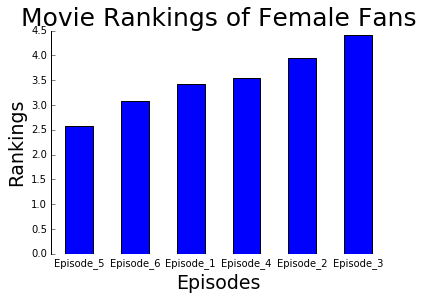

In [46]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    df[column].sort_values().plot.bar(color='blue', rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', bottom = False, right = False, top = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=female_fans_mean_rankings,
         column ='Mean',
         title='Movie Rankings of Female Fans',
         ylabel='Rankings',
         xlabel='Episodes')

Conclusion:

Fans agree that `Episode_5` is the most popular Star Wars movie,`Episode_2` is the second least popular Star Wars movie, and `Episode_3` is the least popular Star Wars movie. Male and female fans disagree on the rankings of `Episode_1`, `Episode_4`, and `Episode_6`. 

## Find the most viewed Star Wars movie of male fans

In [55]:
#create dataframe with the 6 seen columns only
male_seen = male_fans[male_fans.columns[3:9]]

male_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [56]:
#take the sum of the each column
#reset the index of the male_seen_sum
male_seen_sum = male_seen[male_seen.columns].sum().reset_index()

#Rename the 0 column to 'Sum'
male_seen_sum.rename(columns={0: 'Sum'}, inplace=True)
#Rename the 'index' column to 'Seen'
male_seen_sum.rename(columns={'index': 'Seen'}, inplace=True)

male_seen_sum

,Seen,Sum
0,seen_1,361
1,seen_2,323
2,seen_3,317
3,seen_4,342
4,seen_5,392
5,seen_6,387


In [57]:
# Defining a function for renaming labels and the Mean column
def rename_column_name(df, column_name):
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('Seen', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the Mean column to 'rankings'
rename_column_name(df=male_seen_sum, 
                          column_name='Sum')

male_seen_sum

,Sum
Seen,
seen_1,361
seen_2,323
seen_3,317
seen_4,342
seen_5,392
seen_6,387


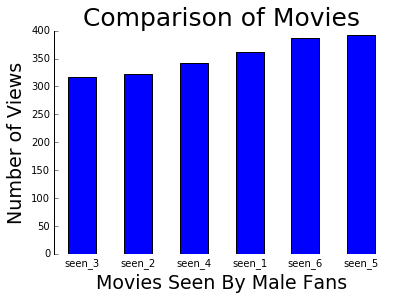

In [59]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    df[column].sort_values().plot.bar(color='blue', rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', bottom = False, right = False, top = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=male_seen_sum,
         column ='Sum',
         title ='Comparison of Movies',
         ylabel ='Number of Views',
        xlabel = 'Movies Seen By Male Fans')

## Find the most viewed Star Wars movie of female fans

In [60]:
#create dataframe with the 6 seen columns only
female_seen = female_fans[female_fans.columns[3:9]]

female_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
112,True,True,False,False,True,True
113,True,False,False,False,False,False
115,True,False,False,False,True,True
117,True,True,True,False,True,True
118,True,True,True,True,True,True
119,False,False,False,False,False,False
121,False,False,True,False,True,True
122,False,False,False,False,False,False
123,True,True,True,True,True,True
124,True,True,True,True,True,True


In [62]:
#take the sum of the each column
#reset the index of the female_seen_sum
female_seen_sum = female_seen[female_seen.columns].sum().reset_index()

#Rename the 0 column to 'Sum'
female_seen_sum.rename(columns={0: 'Sum'}, inplace=True)
#Rename the 'index' column to 'Seen'
female_seen_sum.rename(columns={'index': 'Seen'}, inplace=True)

female_seen_sum

,Seen,Sum
0,seen_1,298
1,seen_2,237
2,seen_3,222
3,seen_4,255
4,seen_5,353
5,seen_6,338


In [63]:
# Defining a function for renaming labels and the Mean column
def rename_column_name(df, column_name):
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('Seen', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the Mean column to 'rankings'
rename_column_name(df=female_seen_sum, 
                          column_name='Sum')

female_seen_sum

,Sum
Seen,
seen_1,298
seen_2,237
seen_3,222
seen_4,255
seen_5,353
seen_6,338


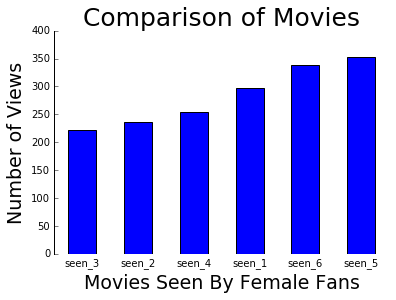

In [64]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    df[column].sort_values().plot.bar(color='blue', rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', bottom = False, right = False, top = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=female_seen_sum,
         column ='Sum',
         title ='Comparison of Movies',
         ylabel ='Number of Views',
        xlabel = 'Movies Seen By Female Fans')

Conclusion:

Among fans, regardless of gender, the most seen Star Wars movie is `seen_5` and the least seen Star Wars movie is `seen_3`. 

Among fans, regardless of gender, the order from most to least seen Star Wars movie is the same: `seen_5`, `seen_6`, `seen_1`, `seen_4`, `seen_2`, and `seen_3`.